In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# store dataset to python
# note: put the intended dataname within "". If it is within the same file just the name. Otherwise inventory
df = pd.read_csv("thesis data.csv", encoding ='utf-8')

In [17]:
df
df_new=df

In [18]:
print(df)

      Subject concept  figure      frame  strategy description Type  \
0         3.0      美味     1.0  sensation  Metonymy         吃豬腳   食物   
1         3.0      美味     2.0  sensation  Metonymy         冰淇淋   食物   
2        10.0      美味     1.0  sensation  Metonymy          美食   食物   
3        14.0      美味     1.0  sensation  Metonymy          牛排   食物   
4        14.0      美味     2.0  sensation  Metonymy          魚排   食物   
...       ...     ...     ...        ...       ...         ...  ...   
1001      NaN     NaN     NaN        NaN       NaN         NaN  NaN   
1002      NaN     NaN     NaN        NaN       NaN         NaN  NaN   
1003      NaN     NaN     NaN        NaN       NaN         NaN  NaN   
1004      NaN     NaN     NaN        NaN       NaN         NaN  NaN   
1005      NaN     NaN     NaN        NaN       NaN         NaN  NaN   

     description.1  
0          process  
1           object  
2        situation  
3           object  
4           object  
...            ...  


In [19]:
#Choosing only datas of metonymy
df_new=df_new[df_new['strategy']=='Metonymy']
# df_new
# Separating target lines & rename
# reference(Line 6): https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

df_new=df_new[['concept','Type','frame']]



In [20]:
# rename: https://blog.csdn.net/chang995196962/article/details/97926062
# definition(rename): https://www.geeksforgeeks.org/python-pandas-dataframe-rename/
df_new.rename(columns={'concept':'概念','Type':'類型','frame':'數量'},inplace=True)

In [21]:
#clean NaN
df_new=df_new.dropna()
#df_new

In [22]:
# 詞彙分析可能還是用一個個單獨輸入的比較好，因為如果最後再一個個畫
list_age = ['童年','少年','青年','中年','老年'] #making lists according to different types of words
list_sen = ['美味','甜味','苦味','香味','臭味']
list_deli =['人生','生命','死亡','快樂','追求']


In [23]:
# Here are the codes to use display Chinese on Python
from matplotlib.font_manager import FontProperties

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

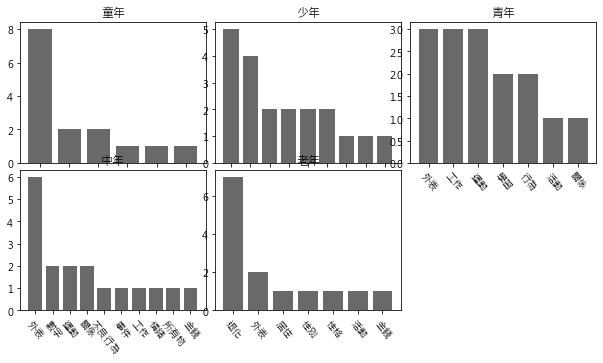

In [69]:
fig = plt.figure(figsize=(8,4))
for i in range(len(list_age)):

    # Take out only one word
    df_agg = df_new[df_new['概念']==list_age[i]] # take only one
    df_agg = df_agg.groupby(['概念','類型']).count() # count number for each term
    df_pic=df_agg.sort_values(by='數量', ascending=False) #set order from the largest amount to the smallest amount
    df_pic = pd.DataFrame(df_pic.to_records()) #convert pivot table back to dataframe


    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    fig.add_subplot(2, 3, i+1) #separate canvas
    

    #***https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py 複雜版
    #https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py 簡易
    #pv_pic.plot.bar(x='類型',y='數量') 不是用於matplotlib
    plt.bar(df_pic['類型'],df_pic['數量'],color="dimgrey")
    plt.xticks(rotation=-50) #x軸斜體
    plt.title(list_age[i])

    # bar graph 參數 1. https://iter01.com/569325.html 2. https://steam.oxxostudio.tw/category/python/example/matplotlib-bar.html
plt.show()

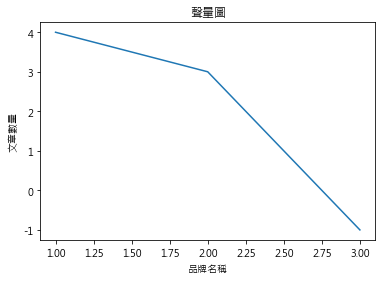

In [19]:
ax
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖")
plt.ylabel("文章數量")
plt.xlabel("品牌名稱") 
plt.show()

In [108]:
df_pic

,概念,類型,數量
0,童年,戶外活動,8
1,童年,娛樂用品,2
2,童年,學習,2
3,童年,才藝,2
4,童年,回憶,1
5,童年,食物,1


In [58]:
#Try to calculate each term
pv_agg=df_new.groupby(['概念','類型']).count()

pv_agg
#已經分出來了，下一步就是由多排到少(只能一個一個詞的分了)
#之後可以用這個函數來排序 df.sort_values(by='數量', ascending=True)
#https://stackoverflow.com/questions/70339417/how-to-order-values-a-dataframe-from-high-to-low-in-python

數量
概念 類型      
中年 不良行為   1
   事件     1
   外表     6
   工作     1
   情緒     1
...      ..
香味 動作     2
   花      5
   食物     6
   香水     3
   體味     1

[100 rows x 1 columns]

In [70]:
#---Visualize the outcome---
# step 1: (trial) drawing a bargraph for "中年"
#slice out a bar graph
pv_pic=pv_agg.pivot_table(index='概念', columns='類型', values='數量')

pv_pic
# step 2: setting up canvas; ref:馬拉松 Day20


類型,下一站,不確定性,不良行為,事件,享受,代表,儀式,動作,動物,反應,...,運動,過程,道路,遠距離,金錢,關係,離開,食物,香水,體味
概念,,,,,,,,,,,,,,,,,,,,,
中年,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN
人生,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
少年,NaN,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
快樂,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
死亡,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
甜味,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
生命,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
童年,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
美味,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN


In [69]:
plt.figure(figsize=(10,8))
pv_pic.bar(figsize=(18.6))
#plt.show()

AttributeError: 'DataFrame' object has no attribute 'bar'

<Figure size 720x576 with 0 Axes>

241      工作
242    不良行為
243      外表
244      外表
245      外表
246      外表
247      外表
248      外表
249      事件
250     所有物
251      金錢
252      情緒
253      運動
254      運動
255      數字
256      數字
257      關係
258      關係
Name: Type, dtype: object